## TP 2 - Descente de Newton

##### Marina SALES REIS

On va utiliser 2 algorithmes : 

1. Newton exact ;
2. Quasi-Newton = BFGS

* Etape de recherche linéaire du pas : méthode de la section dorée
* La méthode de la section dorée nécessite un encadre+ initial 

OBS : Méthode d'encadre+ initial 
1. Cas de validation 
2. Cas de prédiction
3. Comparaison avec la descente de gradient 

Pag 67 de la polycopie 

# Optimisation numérique  - méthodes de Newton

Le but de ce TP est de se familariser avec les méthodes de Newton et de les comparer aux méthodes de
gradient vues dans le TP précédent.

## Partie I : méthode de Newton
Dans cette première partie, il est demandé de coder l'algorithme de Newton, de l'appliquer à la fonctionnelle quadratique utilisée lors de l'exercice 1 du TP sur les méthodes de gradient et, finalement, de comparer les deux approches.

Commençons par importer quelques modules utiles :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

et définissons la fonction à étudier
\begin{equation}
 f(x_1, x_2) = 2x_1^2 + x_2^2 + x_1 x_2 + x_1 + x_2, \tag{1}
\end{equation}
son gradient et sa matrice héssienne :

In [2]:
def func_quad(xx):
    yy=xx.flatten()
    return np.asarray(2.0*yy[0]**2.0+yy[0]*yy[1]+yy[1]**2.0+yy[0]+yy[1])

def grad_quad(xx):
    yy=xx.flatten()
    return np.asarray([[4.0*yy[0]+yy[1]+1.0],[2.0*yy[1]+yy[0]+1.0]])

def hess_quad(xx):
    yy=xx.flatten()
    return np.asarray([[4.0,1.0],[1.0,2.0]])

On définit la fonction `plot` pour avoir des sorties graphiques un peu sympathiques

In [3]:
def plot(xx_list,residu_list,function):
    """
    Sortie des resultats.
    """
    #***** Plot results *****
    fig01=plt.figure(figsize=(15,7))

    #***** Calcul des coordonnees *****
    tmp_array=np.array(xx_list,ndmin=2)[:,:,0].T
    X1_min, X1_max=tmp_array[0].min(), tmp_array[0].max()
    X2_min, X2_max=tmp_array[1].min(), tmp_array[1].max()

    X1, X2 = np.meshgrid(np.linspace(X1_min-0.1*abs(X1_max-X1_min), \
                                     X1_max+0.1*abs(X1_max-X1_min), \
                                     101), \
                         np.linspace(X2_min-0.1*abs(X2_max-X2_min), \
                                     X2_max+0.1*abs(X2_max-X2_min), \
                                     101))

    #***** Calcul de la fonction aux points de coordonnees *****
    Z=np.zeros_like(X1)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j]=function(np.array([[X1[i,j]],[X2[i,j]]]))

    #***** Trace de la courbe *****
    ax0101=fig01.add_subplot(121)
    ax0101.contour(X1,X2,Z)

    xx_list=np.array(xx_list,ndmin=2)[:,:,0].T
    ax0101.plot(xx_list[0],xx_list[1],'k-x')
    ax0101.set_xlabel(r'$x$',size=15)
    ax0101.set_ylabel(r'$y$',size=15)

    #***** Plot history of convergence *****
    ax0102=fig01.add_subplot(122)
    ax0102.plot(residu_list)
    ax0102.set_yscale('log')
    ax0102.set_xlabel("Nombre d'itérations", size=15)
    ax0102.set_ylabel(r'$||\nabla f(x) ||_2$', size=15)
    ax0102.grid()

Définissons ensuite la fonction `Newton` pour coder l'algorithme de Newton. Pour améliorer la lisibilité du code, on définit à l'extérieur de `Newton` les fonctions permettant le calcul du pas et de la direction de descente.

In [4]:
def Newton(x0,grad,hess,tol=1.0e-10,itermax=10000):
    """
    Algorithme de Newton.
    
    Entrées :
    * x0 : tableau numpy de dimension (n,1) ; vecteur d'initialisation de l'algorithme.
    * grad : fonction python ; gradient de la fonction à minimiser, renvoie un tableau numpy de dimension
             (n,1).
    * hess : fonction python ; matrice hessienne de la fonction à minimiser, renvoie un tableau numpy de 
             dimension (n,n).
    * tol : flottant ; tolérance à appliquer au critère d'arrêt de l'algorithme.
    * itermax : entier ; nombre maximum d'itérations de l'algorithme.
    
    Sorties :
    * dictionnaire comportant les paires clé/valeur suivantes :
      * 'xx' : tableau numpy ; liste des itérations.
      * 'residu' : tableau numpy ; liste des résidus.
    """
    list_xx=[x0]

    dire=compute_dire_Newton(list_xx[-1],grad,hess)

    list_residu=[np.linalg.norm(grad(list_xx[-1]),2)]

    k=0
    
    #***** Boucle *****
    while list_residu[-1]>=tol and k<=itermax:
        #----- Calcul de rho(k) -----
        rho=compute_rho_Newton(list_xx, dire)

        #----- Calcul de x(k+1) -----
        list_xx.append(list_xx[-1]+rho*dire)

        #----- Calcul de d(k+1) -----
        dire=compute_dire_Newton(list_xx[-1],grad,hess)

        #----- Enregistrement du residu -----
        list_residu.append(np.linalg.norm(grad(list_xx[-1]),2))

        #----- Avancement de k -----
        k+=1
        
    return {'xx':np.array(list_xx), 'residu':np.array(list_residu)}

C'est ici qu'on définit la fonction `compute_rho_Newton` pour déterminer le pas de descente à chaque itération

In [5]:
def compute_rho_Newton(list_xx, dire):
    """
    Calcul du pas de descente pour une methode de Newton.

    Retourne la valeur du pas, float.
    """
    return 1 # le pass ici c'est juste 1 pour l'algorithme 5.13 de la polycopie 

et là qu'on définit la fonction `compute_dire_Newton` pour calculer la direction de descente à chaque itération

In [6]:
def compute_dire_Newton(xx,grad,hess):
    """
    Calcul de la direction de descente de Newton.

    Entrées :
    * xx : tableau numpy de dimensions (n,1) ; le point courant.
    * grad : fonction python ; la fonction gradient, renvoie un tableau numpy de dimensions (n,1).
    * hess : fonction python ; la fonction hessiennen, renvoie un tableau numpy de dimensions (n,n).

    Sorties :
    * tableau numpy de dimensions (n,1) ; la nouvelle direction de descente.
    """
    return -np.linalg.inv(hess(xx)).dot(grad(xx))
    

Il ne reste alors plus qu'à appeler `Newton` avec les bons arguments pour chercher le minimum de $f$. Pour l'arrêt de l'algorithme, on utilisera la valeur par défaut de la tolérance : $\varepsilon=10^{-10}$.

[[-0.14285714]
 [-0.42857143]] 1.9860273225978185e-15 1


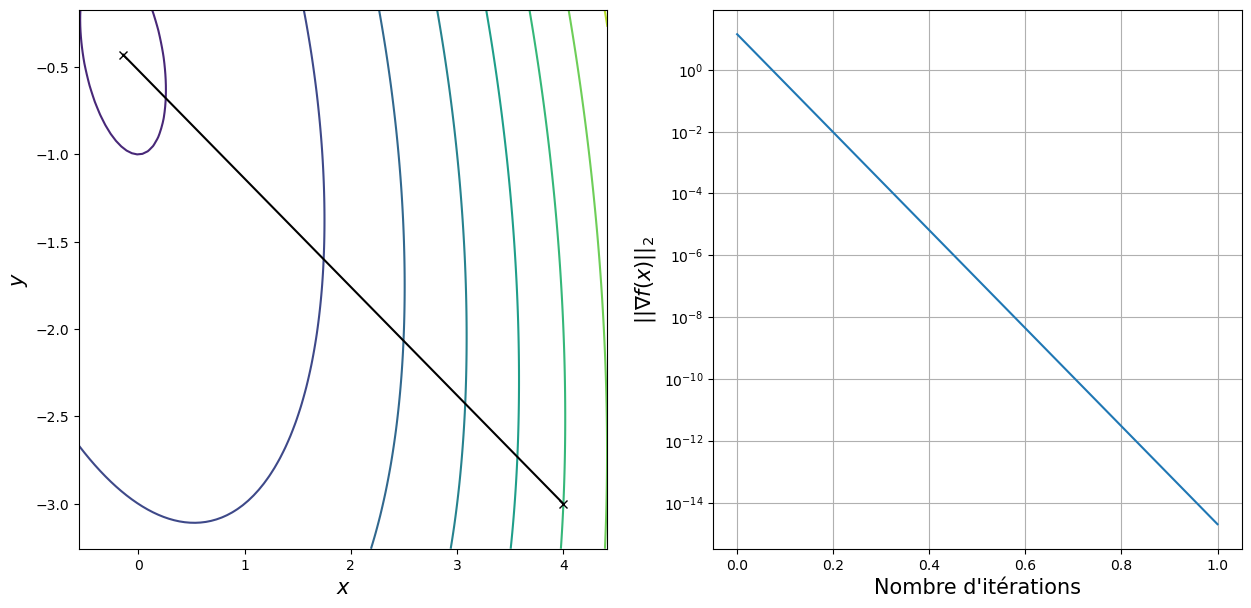

In [7]:
x0=np.array([[4.0],[-3.0]])
resultat=Newton(x0,grad_quad,hess_quad)
print(resultat['xx'][-1],resultat['residu'][-1],len(resultat['residu'])-1)
plot(resultat['xx'],resultat['residu'],func_quad)

In [8]:
print("En comparant avec le TP 1, on a bien trouvé le résultat atendu.")

En comparant avec le TP 1, on a bien trouvé le résultat atendu.


## Partie II : méthode BFGS (quasi-Newton)
Comme pour la méthode de Newton, commençons par définir la fonction `BFGS` dans laquelle on va coder l'algorithme, en prenant soin d'externaliser le calcul du pas et de la direction de descente

In [52]:
def BFGS(x0,func,grad,hess,tol=1.0e-10,itermax=10000):
    """
    Algorithme BFGS.
    
    Entrées :
    * x0 : tableau numpy de dimension (n,1) ; vecteur d'initialisation de l'algorithme.
    * func : fonction python ; fonction à minimiser, renvoie un scalaire.
    * grad : fonction python ; gradient de la fonction à minimiser, renvoie un tableau numpy de dimension
             (n,1).
    * hess : fonction python ; matrice hessienne de la fonction à minimiser, renvoie un tableau numpy de
             dimension (n,n).
    * tol : flottant ; tolérance à appliquer au critère d'arrêt de l'algorithme.
    * itermax : entier ; nombre maximum d'itérations de l'algorithme.
    
    Sorties :
    * dictionnaire comportant les paires clé/valeur suivantes :
      * 'xx' : tableau numpy ; liste des itérations.
      * 'residu' : tableau numpy ; liste des résidus.
    """
    list_xx=[x0]

    Hk=np.identity(2)
    dire=-Hk.dot(grad(list_xx[-1]))

    list_residu=[np.linalg.norm(grad(list_xx[-1]),2)]

    k=0
    
    #***** Boucle *****
    while list_residu[-1]>=tol and k<=itermax:
        #----- Calcul de rho(k) -----
        rho=compute_rho_BFGS(list_xx[-1],dire,func,1.0e-7,10.0)

        #----- Calcul de x(k+1) -----
        list_xx.append(list_xx[-1]+rho*dire)

        #----- Calcul de d(k+1) -----
        dire,Hk=compute_dire_BFGS(list_xx[-1],rho,grad,dire,Hk)

        #----- Enregistrement du residu -----
        list_residu.append(np.linalg.norm(grad(list_xx[-1]),2))

        #----- Avancement de k -----
        k+=1
        
    return {'xx':np.array(list_xx), 'residu':np.array(list_residu)}

Pour le calcul du pas de descente, on va utiliser la méthode de la section dorée. Cette méthode nécessite, en plus, un algorithme d'initialisation pour trouver l'intervalle de départ contenant le minimum à rechercher. Le tout est codé dans la fonction `compute_rho_BFGS`.

In [53]:
def compute_rho_BFGS(xx,dire,func,tol,intervalle):
    """
    Algorithme de la section doree.

    Entrées :
    * xx : tableau numpy de dimensions (n,1) ; le point courant.
    * dire : tableau numpy de dimensions (n,1) ; la direction courante.
    * func : fonction python ; la fonctionnelle a minimiser, renvoie un scalaire.
    * tol : flottant ; tolérance pour l'algorithme de la section dorée.
    * intervalle : flottant ; borne sup pour [0.0;borne_sup].

    Sorties :
    * flottant ; la valeur du pas de descente.
    """
    # algorithmes 5.2 et 5.3
    
    def q(y):
        return func(xx + y*dire)
    
    # algorithme d'encadrement initial 
    itermax1 = 10000
    
    tao = (1+np.sqrt(5))/2
    a = 0
    c = intervalle 
    k = 0
    while q(c) >= q(a) and k <= itermax1:
        c = c - (1-(1/tao))*(c-a)
        k+= 1 # juste pour n'avoir pas un looping infini
    j = 2
    b = j*c
    m = 0
    while q(b) <= q(c) and m <= itermax1:
        j += 1
        b = a + j*(c-a)
        m += 1
        
    # algorithme de la section dorée 
    i = 0
    while abs(b-a)>= tol and i <= itermax1:
        a1 = a + (1/(tao**2))*(b-a)
        b1 = a + (1/tao)*(b-a)
        
        if q(a1) < q(b1):
            b = b1
        elif q(a1) > q(b1):
            a = a1
        elif q(a1) == q(b1):
            a = a1
            b = b1
        i += 1
    rho = (a+b)/2
    return rho 
    


La fonction `compute_rho_BFGS` étant un peu subtile, il peut être judicieux de la tester avant de l'utiliser dans l'algorithme BFGS. Pour ce faire, on peut utiliser la fonction
\begin{equation}
  \begin{cases}
    g(x)=x^2 \\
    g'(x)=2x
  \end{cases}
\end{equation}
en partant, par exemple, de $x=-1$. En toute logique, la fonction `compute_rho_BFGS` devrait nous renvoyer la valeur $0.5$ puisque le minimum de $g(x)$ est obtenu pour $x=0$ et que $-1+0.5\times 2=0$.

In [54]:
def fonction_test(a):
    return a**2

print(compute_rho_BFGS(-1,2,fonction_test,1.0e-8,10.0))

0.49999999819122287


Définissons ensuite la fonction de calcul de la direction de descente : `compute_dire_BFGS`

In [65]:
import numpy as np 
def compute_dire_BFGS(xx,rho,grad,dire,Hk):
    """
    Calcul de la direction de descente par BFGS.

    Entrées :
    * xx : tableau numpy de dimensions (n,1) ; le point courant.
    * rho : flottant ; le pas de descente.
    * grad : fonction python ; la fonction gradient, renvoie un tableau numpy de dimensions (n,1).
    * dire : tableau numpy de dimensions (n,1) ; la direction courante.
    * Hk : tableau numpy de dimensions (n,n) ; la matrice BFGS.

    Sorties :
    * tableau numpy de dimensions (n,1) ; la nouvelle direction de descente.
    * tableau numpy de dimensions (n,n) ; la nouvelle matrice Hk.
    """
    
    # algorithme 5.18
    # on a calculé rho dans la fonction précédente 
    # le while est dans la fonction principalle, pas besoin de le mettre ici  
    
    # xx c'est x(k+1) 
    xk1 = xx
    
    # Hk c'est S(k)

    
    delta_x = rho*dire 
    
    # donc x(k) = xx - delta_x
    
    xk = xk1 - delta_x
    
    delta_g = grad(xk1) - grad(xk) # g(k)
    
    den = delta_x.T.dot(delta_g) # denominateur 
    nom1 = delta_g.T.dot(Hk.dot(delta_g))
    nom2 = delta_x.dot(delta_x.T)
    nom3 = Hk.dot(delta_g.dot(delta_x.T))
    
    U = (1.0 + nom1/den)*nom2/den - (nom3 + nom3.T)/den
    
    Hk1 = Hk + U # S(k+1)
    
    d = - Hk1.dot(grad(xk1))
    return d, Hk1

Enfin, appelons la fonction `BFGS`

[[-0.14285714]
 [-0.42857143]] 7.132808427110588e-11 3


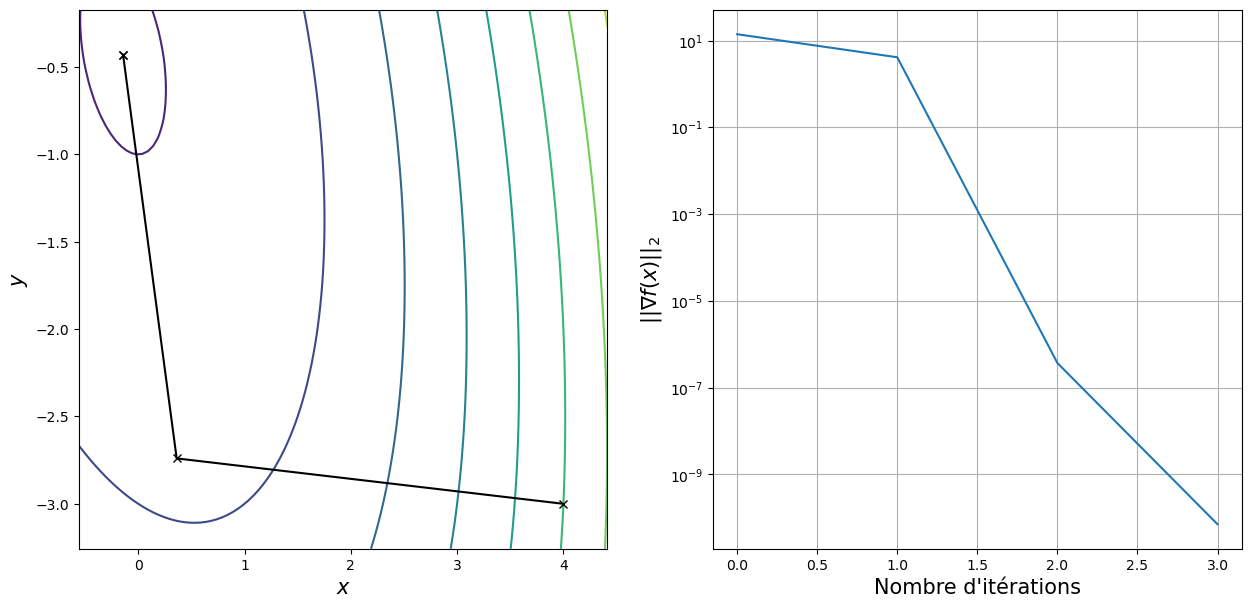

In [66]:
x0=np.array([[4.0],[-3.0]])
resultat=BFGS(x0,func_quad,grad_quad,hess_quad)
print(resultat['xx'][-1],resultat['residu'][-1],len(resultat['residu'])-1)
plot(resultat['xx'],resultat['residu'],func_quad)

## Partie III : application à la fonction de Rosenbrock
Dans cette dernière partie, appliquons les algorithmes que nous venons de coder à la fonction de Rosenbrock qui est un cas test classique de l'optimisation numérique. La fonction de Rosenbrock en 2D est définie par
\begin{equation}
  r(x_1,x_2)=100(x_2-x_1^2)^2 + (1-x_1)^2
\end{equation}
et admet un minimum en $(1,1)^T$. Elle est déjà définie dans le module `scipy.optimize`, alors on va simplement importer `scipy.optimize` et reformater la fonction de Rosenbrock, son gradient et sa hessienne, selon nos besoins :

In [67]:
import scipy.optimize as spo

def func_rosen(xx):
    yy=xx.flatten()
    return spo.rosen(yy)

def grad_rosen(xx):
    yy=xx.flatten()
    gra=spo.rosen_der(yy)
    return gra.reshape((gra.shape[0],1))

def hess_rosen(xx):
    yy=xx.flatten()
    return spo.rosen_hess(yy)

et voyons un peu la tête de cette fonction

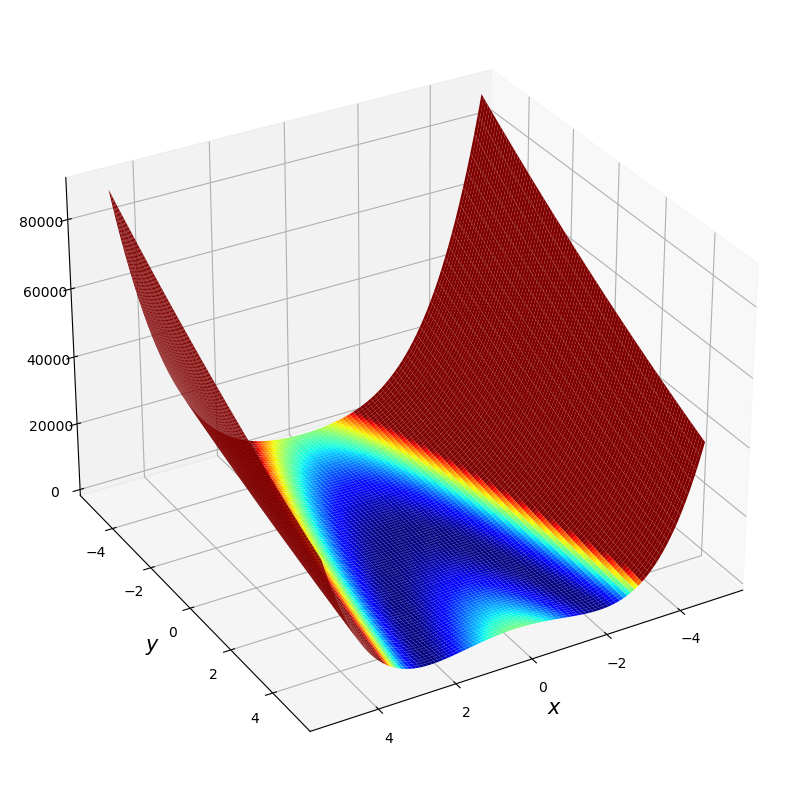

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig03=plt.figure(figsize=(10,10))
ax0301=fig03.add_subplot(111,projection='3d')

xdemo=np.linspace(-5,5,201)
ydemo=np.linspace(-5,5,201)
XX, YY = np.meshgrid(xdemo,ydemo)
ZZ = spo.rosen([XX,YY])

ax0301.plot_surface(XX,YY,ZZ,cmap='jet', shade='gouraud', vmax=5000,rcount=200, ccount=200)
ax0301.view_init(30,60)
ax0301.set_xlabel(r'$x$', size=15)
ax0301.set_ylabel(r'$y$', size=15);

### Avec la méthode de Newton
On va d'abord tester notre algorithme de Newton en partant de $x_0=(-1,-1)^T$ :

[[-0.14285714]
 [-0.42857143]] 94.04278307906826 10001


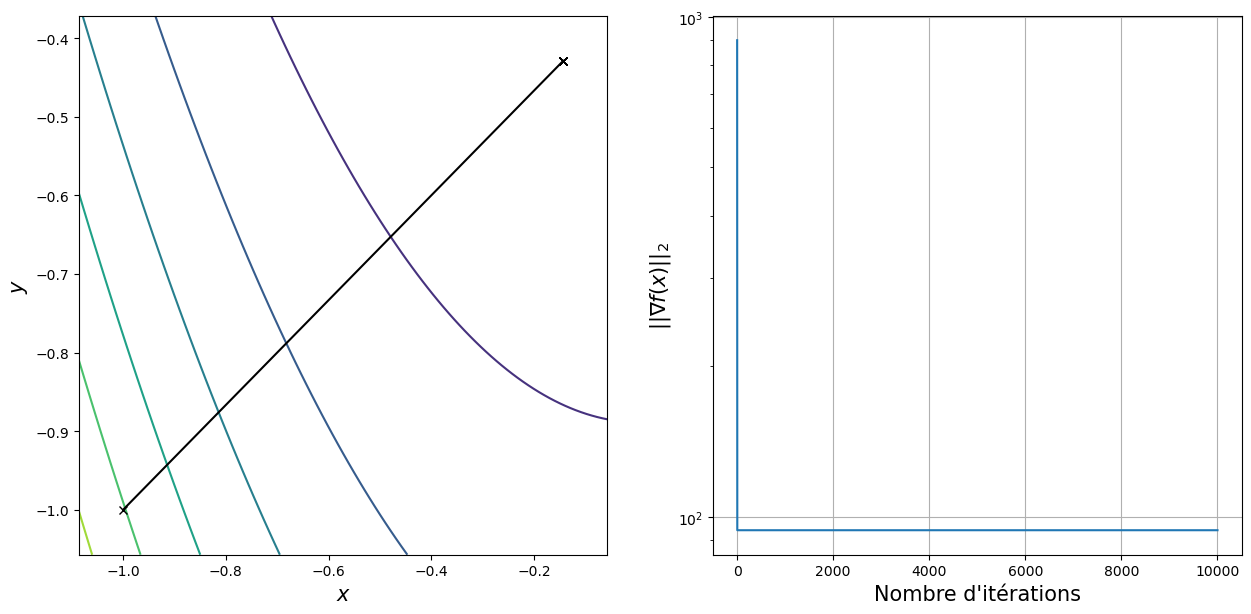

In [69]:
x0=np.array([[-1.0],[-1.0]])
resultat=Newton(x0,grad_rosen,hess_rosen)
print(resultat['xx'][-1],resultat['residu'][-1],len(resultat['residu'])-1)
plot(resultat['xx'],resultat['residu'],func_rosen)

puis en démarrant de $x_0=(-10,-10)^T$ :

[[-0.14285714]
 [-0.42857143]] 94.04278307906826 10001


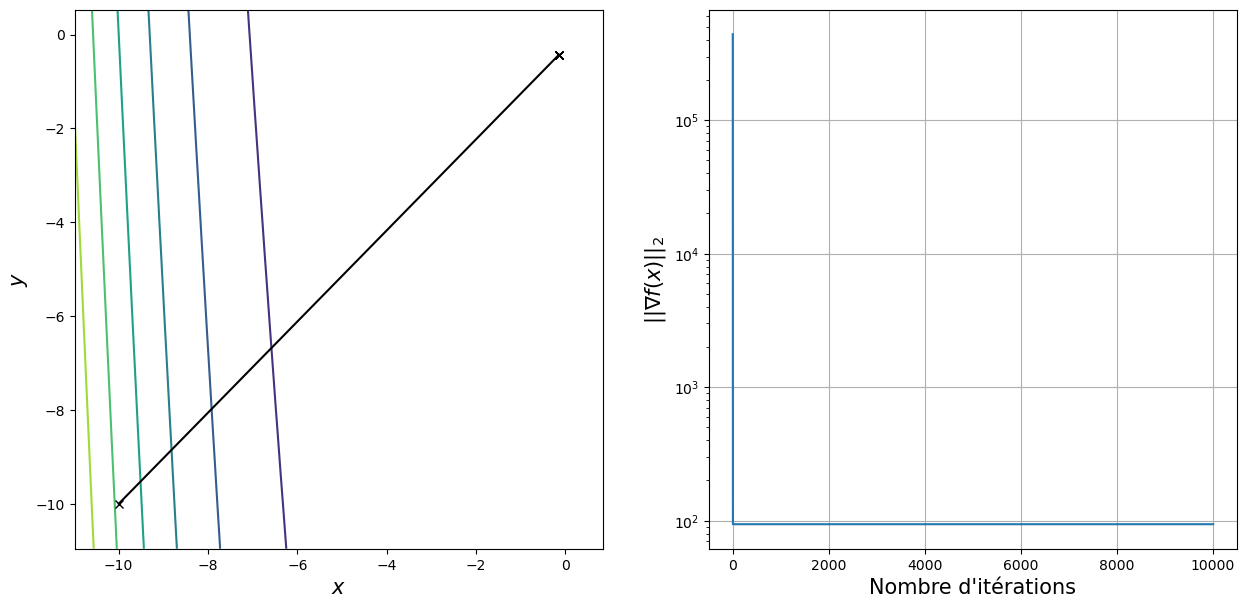

In [70]:
x0=np.array([[-10.0],[-10.0]])
resultat=Newton(x0,grad_rosen,hess_rosen)
print(resultat['xx'][-1],resultat['residu'][-1],len(resultat['residu'])-1)
plot(resultat['xx'],resultat['residu'],func_rosen)

### Avec la méthode BFGS
On fait de même avec l'algorithme BFGS, c'est-à-dire $x_0=(-1,-1)^T$ :

[[1.]
 [1.]] 0.0 13


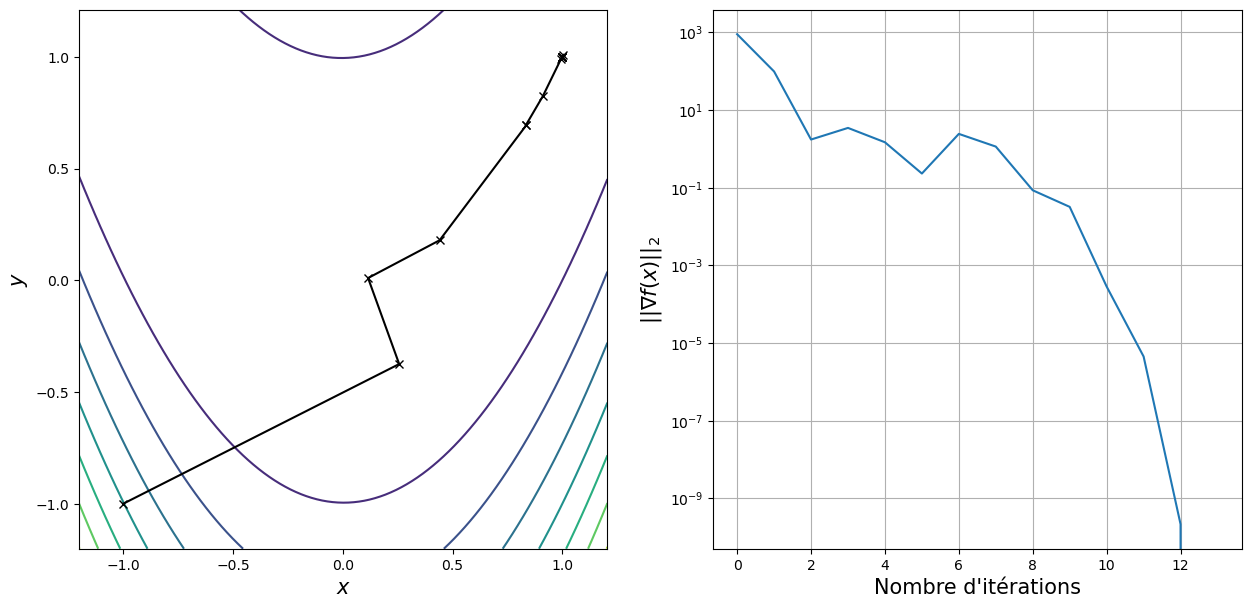

In [71]:
x0=np.array([[-1.0],[-1.0]])
resultat=BFGS(x0,func_rosen,grad_rosen,hess_rosen)
print(resultat['xx'][-1],resultat['residu'][-1],len(resultat['residu'])-1)
plot(resultat['xx'],resultat['residu'],func_rosen)

et $x_0=(-10,-10)^T$ :

[[1.]
 [1.]] 4.704543697838735e-12 23


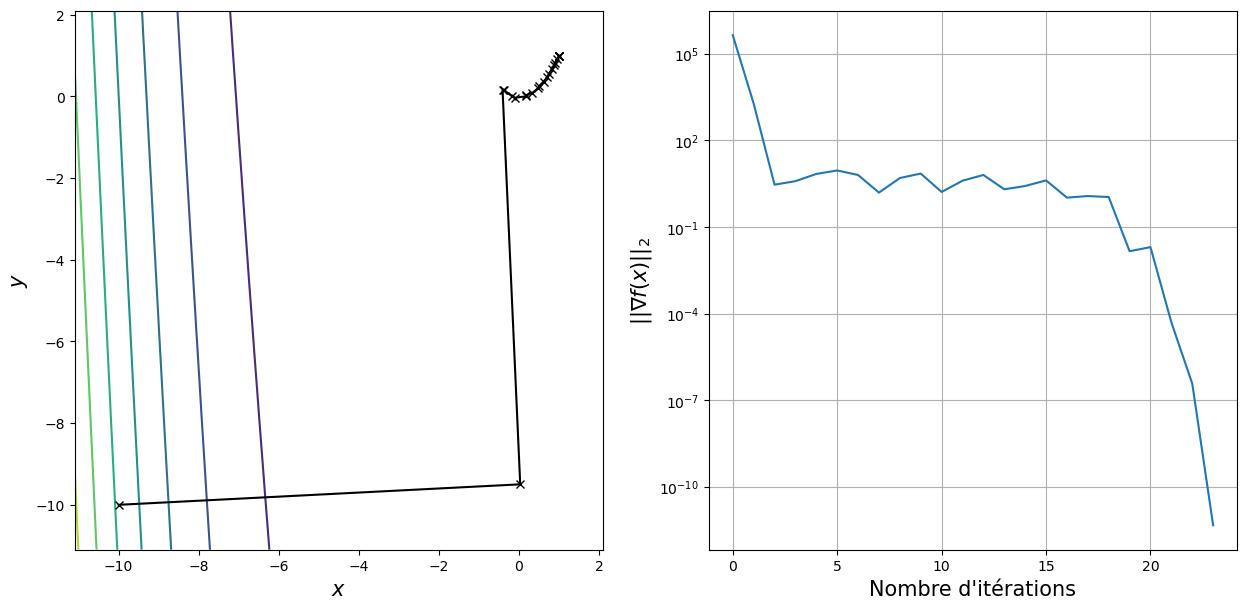

In [72]:
x0=np.array([[-10.0],[-10.0]])
resultat=BFGS(x0,func_rosen,grad_rosen,hess_rosen)
print(resultat['xx'][-1],resultat['residu'][-1],len(resultat['residu'])-1)
plot(resultat['xx'],resultat['residu'],func_rosen)

### Conclusion partielle
La méthode BFGS semble, dans tous les cas, converger moins rapidement que la méthode de Newton. Quel peut-être, alors, l'intérêt de la méthode BFGS ?

## Partie IV : comparaison avec les méthodes de gradient
Pour pouvoir comparer les méthodes de Newton avec la méthode de gradient conjugué, il faut d'abord *uploader* puis importer le fichier `gradients.pyc` qui se trouve sur SAVOIR :

In [ ]:
from gradients import *

Ensuite, il n'y a plus qu'à valider les lignes de codes qui suivent...

### Pour la fonctionnelle quadratique $f(x_1,x_2)$

In [ ]:
def func_01(xx):
    return np.asarray(2.0*xx[0]**2.0+xx[0]*xx[1]+xx[1]**2.0+xx[0]+xx[1])

def grad_01(xx):
    return np.asarray([4.0*xx[0]+xx[1]+1.0,2.0*xx[1]+xx[0]+1.0])

test_01=gene_grad()

test_01.param['function']=func_01
test_01.param['gradient']=grad_01

test_01.param['descent']['method']='conjugate'
test_01.param['step']['method']='optimal'
test_01.param['step']['optimal']['golden section']['tolerance']=1.0e-8
test_01.param['step']['optimal']['golden section']['interval']=2.0

test_01.param['guess']=np.asarray([[4.0],[-3.0]])
test_01.param['tolerance']=1.0e-8
test_01.param['itermax']=10000

test_01.run()
test_01.plot()

### Pour la fonction de Rosenbrock
D'abord pour $x_0=(-1,-1)^T$

In [ ]:
test_02=gene_grad()

test_02.param['function']=spo.rosen
test_02.param['gradient']=spo.rosen_der

test_02.param['descent']['method']='conjugate'

test_02.param['step']['method']='optimal'
test_02.param['step']['optimal']['method']='golden section'
test_02.param['step']['optimal']['golden section']['tolerance']=1.0e-8
test_02.param['step']['optimal']['golden section']['interval']=10.0

test_02.param['guess']=np.asarray([[-1.0],[-1.0]])
test_02.param['tolerance']=1.0e-10
test_02.param['itermax']=100000

test_02.run()
test_02.plot()

Puis pour $x_0=(-10,-10) ^T$

In [ ]:
test_03=gene_grad()

test_03.param['function']=spo.rosen
test_03.param['gradient']=spo.rosen_der

test_03.param['descent']['method']='conjugate'

test_03.param['step']['method']='optimal'
test_03.param['step']['optimal']['method']='golden section'
test_03.param['step']['optimal']['golden section']['tolerance']=1.0e-8
test_03.param['step']['optimal']['golden section']['interval']=10.0

test_03.param['guess']=np.asarray([[-10.0],[-10.0]])
test_03.param['tolerance']=1.0e-10
test_03.param['itermax']=100000

test_03.run()
test_03.plot()